In [1]:
#we import libraries as necessary
import pandas as pd
import re
import src.cleaning as clean
import src.manipulating_df as man
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#we wil import our previously cleaned worldwide_emissions cvs file to take conclusions out of it
world_emissions=man.open_cvs()
#world_emissions file in src folder

Please, enter the folder where your cvs file is saved:
src
Please, enter the name for the cvs file you want to open without extension:
world_emissions


In [3]:
# we check that the DataFrame exportation is correct
world_emissions['CO2_MillionTonnes']=world_emissions['CO2_Tonnes'].map(lambda x: x/1E6)
world_emissions.head(5)

,Year,CO2_Tonnes,CO2_MillionTonnes
0,1751,93505.28,0.093505
1,1752,187047.20,0.187047
2,1753,280589.12,0.280589
3,1754,374167.68,0.374168
4,1755,467782.88,0.467783


#### We want to see CO2 total emission through History, and on average by year

In [4]:
world_emissions["Year_interval"] =pd.cut(world_emissions['Year'],[1750,1800,1850,1900,1950,2000,2050],labels=['1750','1800','1850','1900','1950','2000'])
world_emissions_years=world_emissions.groupby(['Year_interval']).agg({"CO2_MillionTonnes":["sum","mean"]})
clean.rounding(world_emissions_years)

CO2_MillionTonnes          
                            sum      mean
Year_interval                            
1750                     161.46      3.23
1800                    1088.84     21.78
1850                    9232.45    184.65
1900                   63706.79   1274.14
1950                  279190.00   5583.80
2000                  221600.00  13035.29

<Figure size 576x576 with 0 Axes>

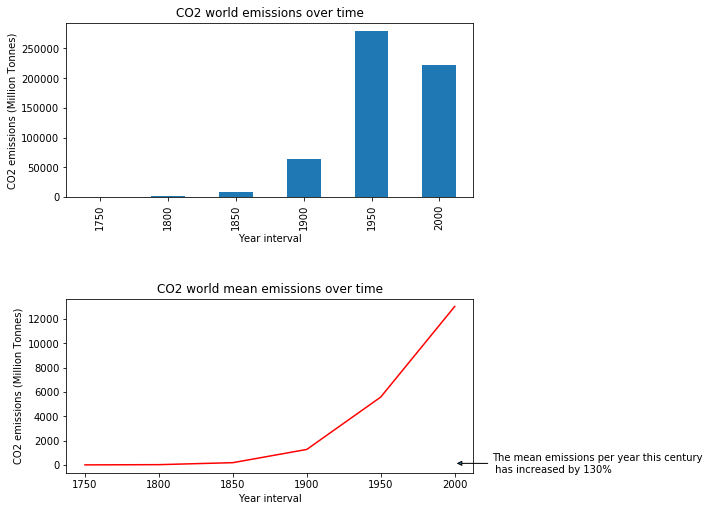

<Figure size 576x576 with 0 Axes>

In [5]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
world_emissions_years['CO2_MillionTonnes',  'sum'].plot.bar(xlabel='Year interval',ylabel='CO2 emissions (Million Tonnes)',title='CO2 world emissions over time')

plt.tight_layout(pad=5.50)
plt.subplot(2,1,2)
world_emissions_years['CO2_MillionTonnes',  'mean'].plot(xlabel='Year interval',ylabel='CO2 emissions (Million Tonnes)',title='CO2 world mean emissions over time',c='r')
plt.annotate('The mean emissions per year this century \n has increased by 130%',xy=(5,130.5), xytext=(5.5,100),arrowprops={'arrowstyle': '-|>'}, va='center')
plt.figure(figsize=(8,8))


### CO2 emissions produced by vehicles worldwide

In [6]:
#we wil import our previously cleaned vehicles cvs file to take conclusions out of it
vehicles=man.open_cvs()
#vehicles file in src folder

Please, enter the folder where your cvs file is saved:
src
Please, enter the name for the cvs file you want to open without extension:
vehicles


In [7]:
vehicles_emissions=vehicles.groupby(['Vehicle_Class']).agg({'CO2_Emissions(g/km)':'mean'})
clean.rounding(vehicles_emissions)
vehicles_emissions=vehicles_emissions.sort_values(by='CO2_Emissions(g/km)',ascending=False)
vehicles_emissions

,CO2_Emissions(g/km)
Vehicle_Class,
VAN - PASSENGER,397.21
VAN - CARGO,361.50
SUV - STANDARD,304.84
PICKUP TRUCK - STANDARD,301.51
PICKUP TRUCK - SMALL,278.97
TWO-SEATER,277.45
FULL-SIZE,263.32
MINIVAN,262.31
SUBCOMPACT,246.45


<Figure size 720x576 with 0 Axes>

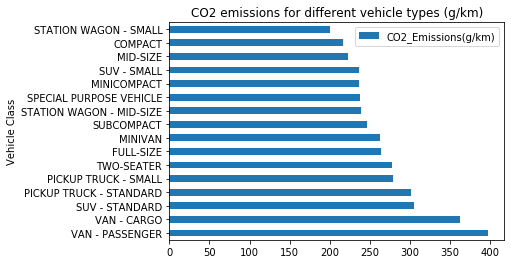

It can be seen that the most inefficient vehicles are vans, with great difference.
In general terms, it could be said that the bigger the car, the less efficient


In [8]:
plt.figure(figsize=(10,8))
vehicles_emissions.plot.barh(xlabel='Vehicle Class',title='CO2 emissions for different vehicle types (g/km)')
plt.show()
print('It can be seen that the most inefficient vehicles are vans, with great difference.\nIn general terms, it could be said that the bigger the car, the less efficient')

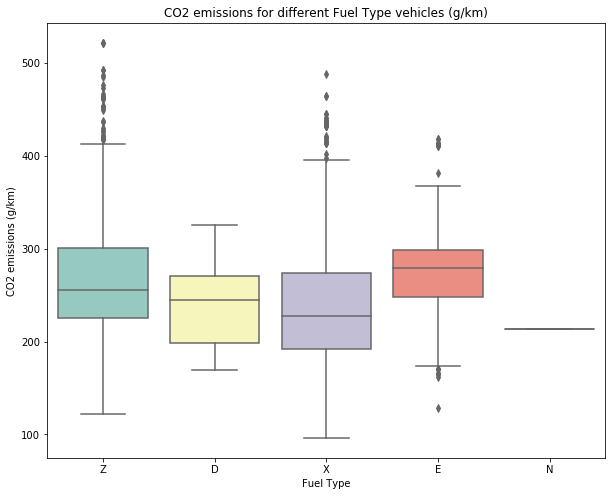

As it can be seen, the highest emissions are produced by Ethanol vehicles, where data is fairly concentrated


In [9]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Fuel_Type", y="CO2_Emissions(g/km)", data=vehicles, palette="Set3")
plt.title('CO2 emissions for different Fuel Type vehicles (g/km)')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 emissions (g/km)')
plt.show()
print('As it can be seen, the highest emissions are produced by Ethanol vehicles, where data is fairly concentrated')

In [10]:
mean_emission=round(vehicles['CO2_Emissions(g/km)'].mean(),2)
print(f'The mean CO2 emission for a vehicle is {mean_emission} g/km')

The mean CO2 emission for a vehicle is 250.58 g/km


### Number of registered vehicles worldwide

In [11]:
#we wil import our previously cleaned register cvs file to take conclusions out of it
register=man.open_cvs()
#register file in src folder

Please, enter the folder where your cvs file is saved:
src
Please, enter the name for the cvs file you want to open without extension:
register


In [12]:
# we check that the DataFrame exportation is correct
register.head()

,Country,Year,Number_of_registered_vehicles
0,Albania,2016,563106
1,Antigua and Barbuda,2016,36030
2,Argentina,2016,21633587
3,Australia,2016,18326236
4,Austria,2016,7421647


In [13]:
registered_vehicles_2016=(register[register['Year'].isin(['2016','2016-2017'])]['Number_of_registered_vehicles'].sum())/1E6
registered_vehicles_2016=clean.rounding_value(registered_vehicles_2016)
print(f'There were {registered_vehicles_2016} millions vehicles registered  in the world in 2016')

There were 1267.16 millions vehicles registered  in the world in 2016


In [14]:
registered_vehicles_2015=(register[register['Year'].isin(['2015','2015-2016'])]['Number_of_registered_vehicles'].sum())/1E6
registered_vehicles_2015=clean.rounding_value(registered_vehicles_2015)
print(f'There were {registered_vehicles_2015} million vehicles registered  in the world in 2015')

There were 703.12 million vehicles registered  in the world in 2015


In [15]:
sales_2016=registered_vehicles_2016-registered_vehicles_2015
sales_2016=clean.rounding_value(sales_2016)
print(f'{sales_2016} millions vehicles were bought in the world in 2016')

564.04 millions vehicles were bought in the world in 2016


In [16]:
world_emissions_2016=world_emissions[world_emissions['Year']==2016]['CO2_MillionTonnes'].sum()

In [17]:
print(f'In 2016, the total CO2 emission in the world were {world_emissions_2016} Million Tonnes')

In 2016, the total CO2 emission in the world were 15400.0 Million Tonnes


#### Asumming a 30.000km-long mean ride for a vehicle in a year:

In [21]:
mean_ride=30000
vehicles_emissions_2016=registered_vehicles_2016*mean_ride*mean_emission/1E6
vehicles_emissions_2016=clean.rounding_value(vehicles_emissions_2016)

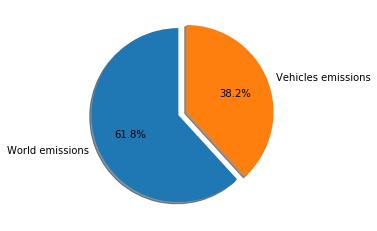

In [22]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'World emissions', 'Vehicles emissions' 
sizes = [world_emissions_2016, vehicles_emissions_2016]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')


plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)


plt.show()

### European Comission Expects ZERO CO2 emissions in 2050

#### Therefore, penalties of 95€ per emitted CO2 gram and vehicule will be applied from 2022 on
#### For a million cars sold in a year:

In [34]:
penalty=95
penalty_year=(round(1E5*mean_emission*penalty/1E6,2))
print(f'For a penalty of {penalty}€/ emitted CO2 gram per vehicle, the total penalty per year would ascend to {penalty_year} Millions €\nfor 100.000 cars sold in Europe')

For a penalty of 95€/ emitted CO2 gram per vehicle, the total penalty per year would ascend to 2380.51 Millions €
for 100.000 cars sold in Europe
